In [1]:
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
X = np.loadtxt("../data/abalone.test.nld", delimiter=',')
X.shape

(4177, 9)

In [5]:
sil_values = silhouette_samples(X,labels)

S score with 2 clusters is 0.3855228537943357
S score with 3 clusters is 0.4192367190981106
S score with 4 clusters is 0.38515750995499926
S score with 5 clusters is 0.3995961702406116
S score with 6 clusters is 0.4156780594998562
S score with 7 clusters is 0.399965768411782
S score with 8 clusters is 0.3941619425230578
S score with 9 clusters is 0.386104830482174
S score with 10 clusters is 0.372338544407045
S score with 11 clusters is 0.36750538159010054
S score with 12 clusters is 0.35611264306381357


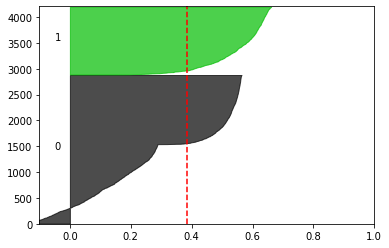

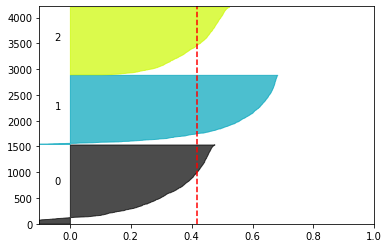

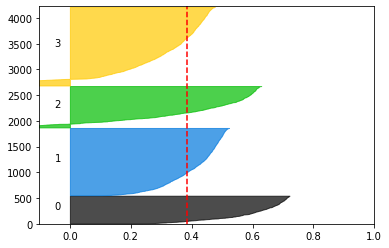

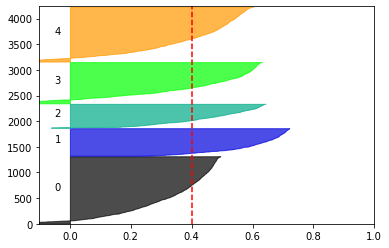

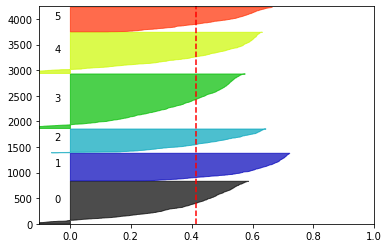

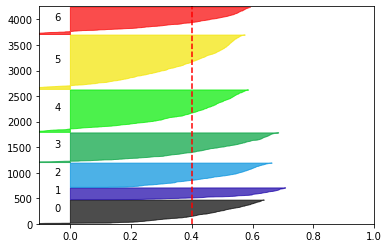

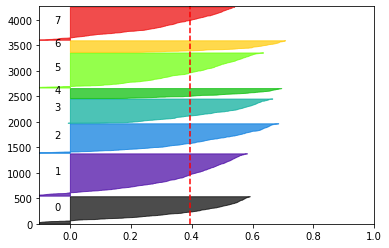

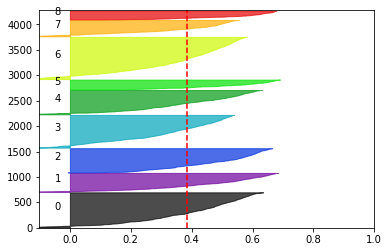

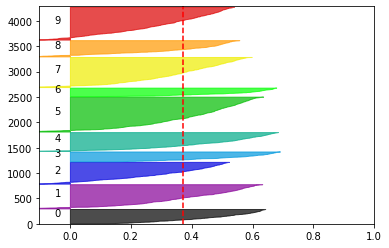

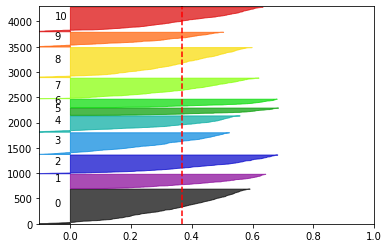

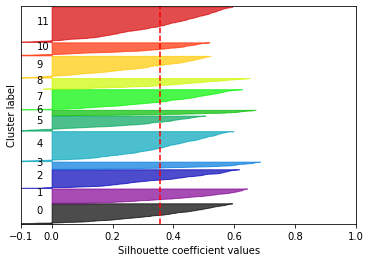

In [6]:
n_clusters = range(2,13)

for N in n_clusters:
    fig,ax = plt.subplots(1,1)
    y_lower = 10    

    sc = SpectralClustering(affinity='nearest_neighbors',n_neighbors=40,n_clusters=N,assign_labels="discretize")
    labels = sc.fit_predict(X)
    sil_values = silhouette_samples(X,labels)
    
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (N + 1) * 10])

    for i in range(N):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        vi = sil_values[labels == i]
        vi.sort()
    
        Ni = vi.shape[0]
        y_upper = y_lower + Ni

        color = cm.nipy_spectral(float(i) / N)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, vi,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * Ni, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    # The vertical line for average silhouette score of all the values       
    silhouette_avg = silhouette_score(X,labels)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    print('S score with {} clusters is {}'.format(N,silhouette_avg))

ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]);
plt.show()
